<a href="https://colab.research.google.com/github/Deeksha040/ML/blob/main/ANN_(diabetics_csv).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnencies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.isnull().sum()

Pregnencies                   0
Glucose                       0
Blood Pressure                0
Skin Thickness                0
Insulin                       0
BMI                           0
Diabetes Pedigree Function    0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
 import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
 df["Outcome"]=np.where(df["Outcome"]==1, "Diabetic","NonDiabetic")

In [ ]:
df.head()

,Pregnencies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,NonDiabetic
2,8,183,64,0,0,23.3,0.672,32,Diabetic
3,1,89,66,23,94,28.1,0.167,21,NonDiabetic
4,0,137,40,35,168,43.1,2.288,33,Diabetic


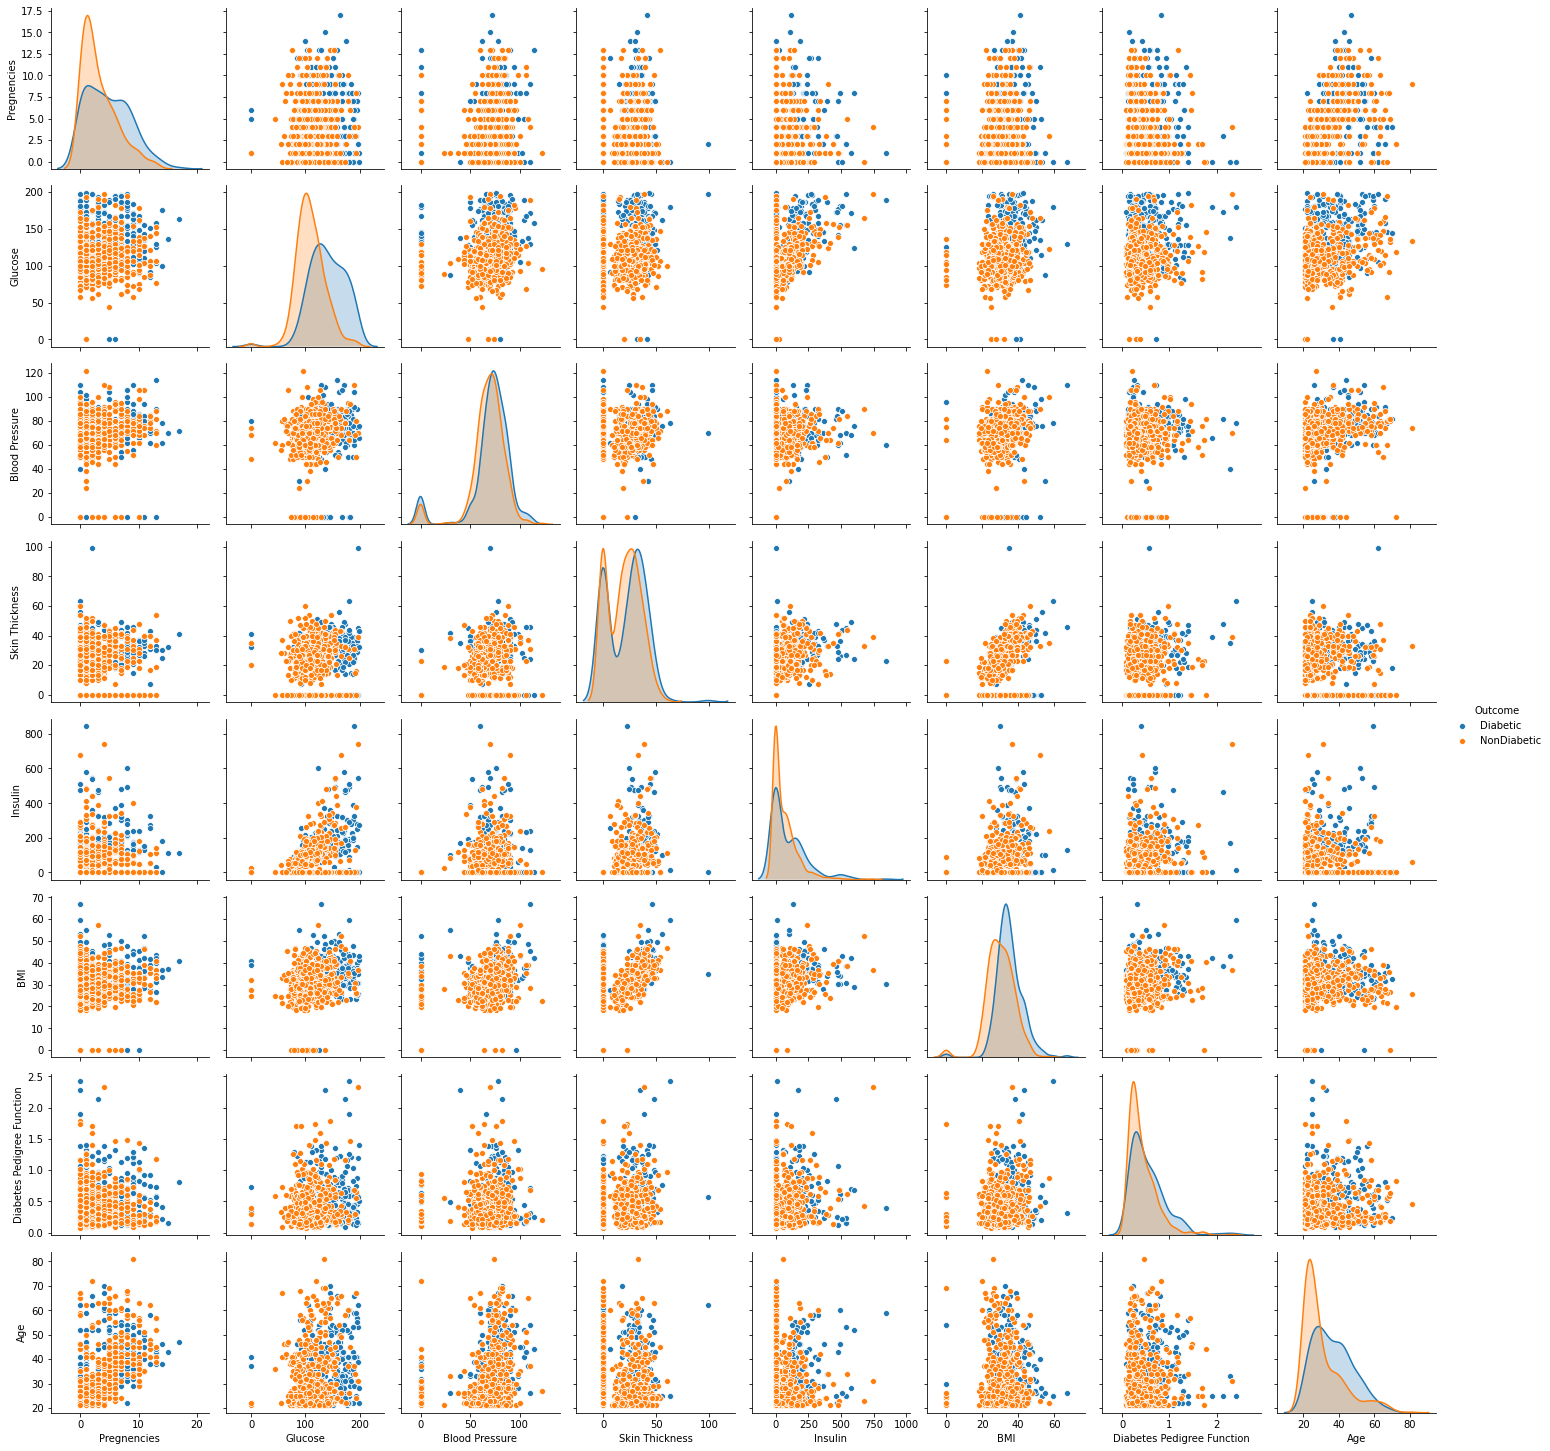

In [ ]:
sns.pairplot(df,hue="Outcome")

In [ ]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnencies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
X=df.drop("Outcome",axis=1).values
y=df["Outcome"].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

In [ ]:
!pip3 install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl
!pip3 install torchvision

     |████████████████████████████████| 592.3MB 1.2MB/s 
ERROR: torchvision 0.6.1+cu101 has requirement torch==1.5.1, but you'll have torch 0.3.0.post4 which is incompatible.
ERROR: fastai 1.0.61 has requirement torch>=1.0.0, but you'll have torch 0.3.0.post4 which is incompatible.
  Found existing installation: torch 1.5.1+cu101
    Uninstalling torch-1.5.1+cu101:
      Successfully uninstalled torch-1.5.1+cu101
     |████████████████████████████████| 753.2MB 22kB/s 
  Found existing installation: torch 0.3.0.post4
    Uninstalling torch-0.3.0.post4:
      Successfully uninstalled torch-0.3.0.post4


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
#creating tensors for indepent variable
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)

In [ ]:
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [ ]:
df.shape

(768, 9)

In [ ]:
#creating   model

class ANN_model(nn.Module):
  def __init__(self,input_features=8,hidden1=20,hidden2=20,out_features=2):
    super ().__init__()
    self.f_connected1=nn.Linear(input_features,hidden1)
    self.f_connected2=nn.Linear(hidden1,hidden2)
    self.out=nn.Linear(hidden2,out_features)

  def forward(self,x):
    x=F.relu(self.f_connected1(x))
    x=F.relu(self.f_connected2(x))
    x=self.out(x)
    return x


In [ ]:
# instantiate ANN _model
torch.manual_seed(20)
model=ANN_model()

In [ ]:
model.parameters

<bound method Module.parameters of ANN_model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [ ]:
# Back Propogation Loss function and optimizer
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [ ]:
epochs=500
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 3.457212209701538
Epoch number: 11 and the loss : 0.8019213080406189
Epoch number: 21 and the loss : 0.6090323328971863
Epoch number: 31 and the loss : 0.5917772054672241
Epoch number: 41 and the loss : 0.5679708123207092
Epoch number: 51 and the loss : 0.5529038906097412
Epoch number: 61 and the loss : 0.5410095453262329
Epoch number: 71 and the loss : 0.5310391187667847
Epoch number: 81 and the loss : 0.522036075592041
Epoch number: 91 and the loss : 0.5135970115661621
Epoch number: 101 and the loss : 0.5061254501342773
Epoch number: 111 and the loss : 0.4983409643173218
Epoch number: 121 and the loss : 0.4960549771785736
Epoch number: 131 and the loss : 0.4828638434410095
Epoch number: 141 and the loss : 0.4756038784980774
Epoch number: 151 and the loss : 0.4833468496799469
Epoch number: 161 and the loss : 0.4882737398147583
Epoch number: 171 and the loss : 0.46933555603027344
Epoch number: 181 and the loss : 0.46626192331314087
Epoch number: 191 and t

In [ ]:
# plot the Loss function
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'Epoch')

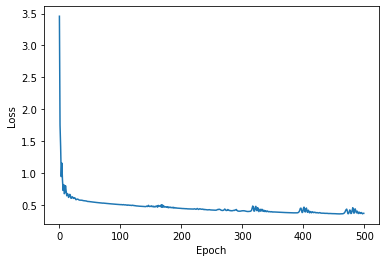

In [ ]:
plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [ ]:
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
0
0
1
0
0
1
1
1
0
1
1
0
1
0
0
1
0
0
0
1
0
0
0
0
1
0
1
0
0
0
0
0
1
0
1
1
0
0
1
0
0
0
1
1
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
1
0
0
1
1
1
1
0
0
0
0
0
0
1
1
0
0
1
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
1
1
0
0
0
0
1
1
0
0
0
1
0
1
1
0
0
1
0
1
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
1
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

array([[92, 15],
       [16, 31]])

Text(69.0, 0.5, 'Predicted Values')

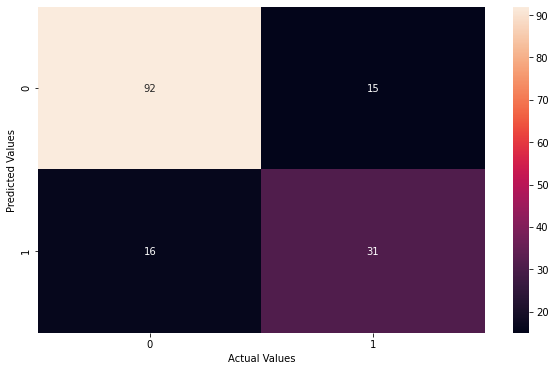

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

0.7987012987012987

In [ ]:

#### Save the model
torch.save(model,'diabetes.pt')

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:402: UserWarning: Couldn't retrieve source code for container of type ANN_model. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [ ]:
#### Save And Load the model
model=torch.load('diabetes.pt')

In [ ]:
model.eval()

ANN_model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [ ]:
### Predcition of new data point
list(df.iloc[0,:-1])

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [ ]:
#### New Data
lst1=[6.0, 130.0, 72.0, 40.0, 0.0, 25.6, 0.627, 45.0]

In [ ]:
new_data=torch.tensor(lst1)

In [ ]:
#### Predict new data using Pytorch
with torch.no_grad():
    print(model(new_data))
    print(model(new_data).argmax().item())

tensor([1.5015, 0.9838])
0


In [ ]:
new_data=torch.tensor(lst1)

In [ ]:
# prediction in X_test data
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
      print(model(data))


tensor([1.6792, 4.4540])
tensor([ 2.4671, -0.9791])
tensor([2.1007, 1.0794])
tensor([0.3265, 0.9230])
tensor([2.2385, 1.3460])
tensor([ 3.7778, -1.3581])
tensor([-0.7957,  1.4091])
tensor([0.0274, 1.7340])
tensor([-0.6519, -0.4153])
tensor([ 0.6279, -1.1806])
tensor([-0.5417,  1.0049])
tensor([-1.0141,  1.9696])
tensor([2.3678, 0.8067])
tensor([-2.1645,  0.7711])
tensor([ 2.6766, -1.7092])
tensor([2.2545, 0.3819])
tensor([-0.3137,  1.7167])
tensor([ 2.5685, -0.5082])
tensor([1.5730, 1.5014])
tensor([0.8678, 0.1982])
tensor([1.4410, 2.5563])
tensor([3.3708, 1.7904])
tensor([1.3470, 0.8847])
tensor([ 3.9886, -2.8946])
tensor([ 2.4463, -1.9503])
tensor([1.6602, 1.8992])
tensor([3.0176, 0.1206])
tensor([-1.0458,  1.4638])
tensor([2.5157, 0.5338])
tensor([2.1400, 1.3437])
tensor([0.7549, 0.3683])
tensor([1.2709, 0.4424])
tensor([ 1.1069, -0.7193])
tensor([-0.2098,  0.5747])
tensor([2.2039, 0.7438])
tensor([3.0878, 4.4880])
tensor([-0.0471,  0.7591])
tensor([ 4.5467, -1.8023])
tensor([0.7479